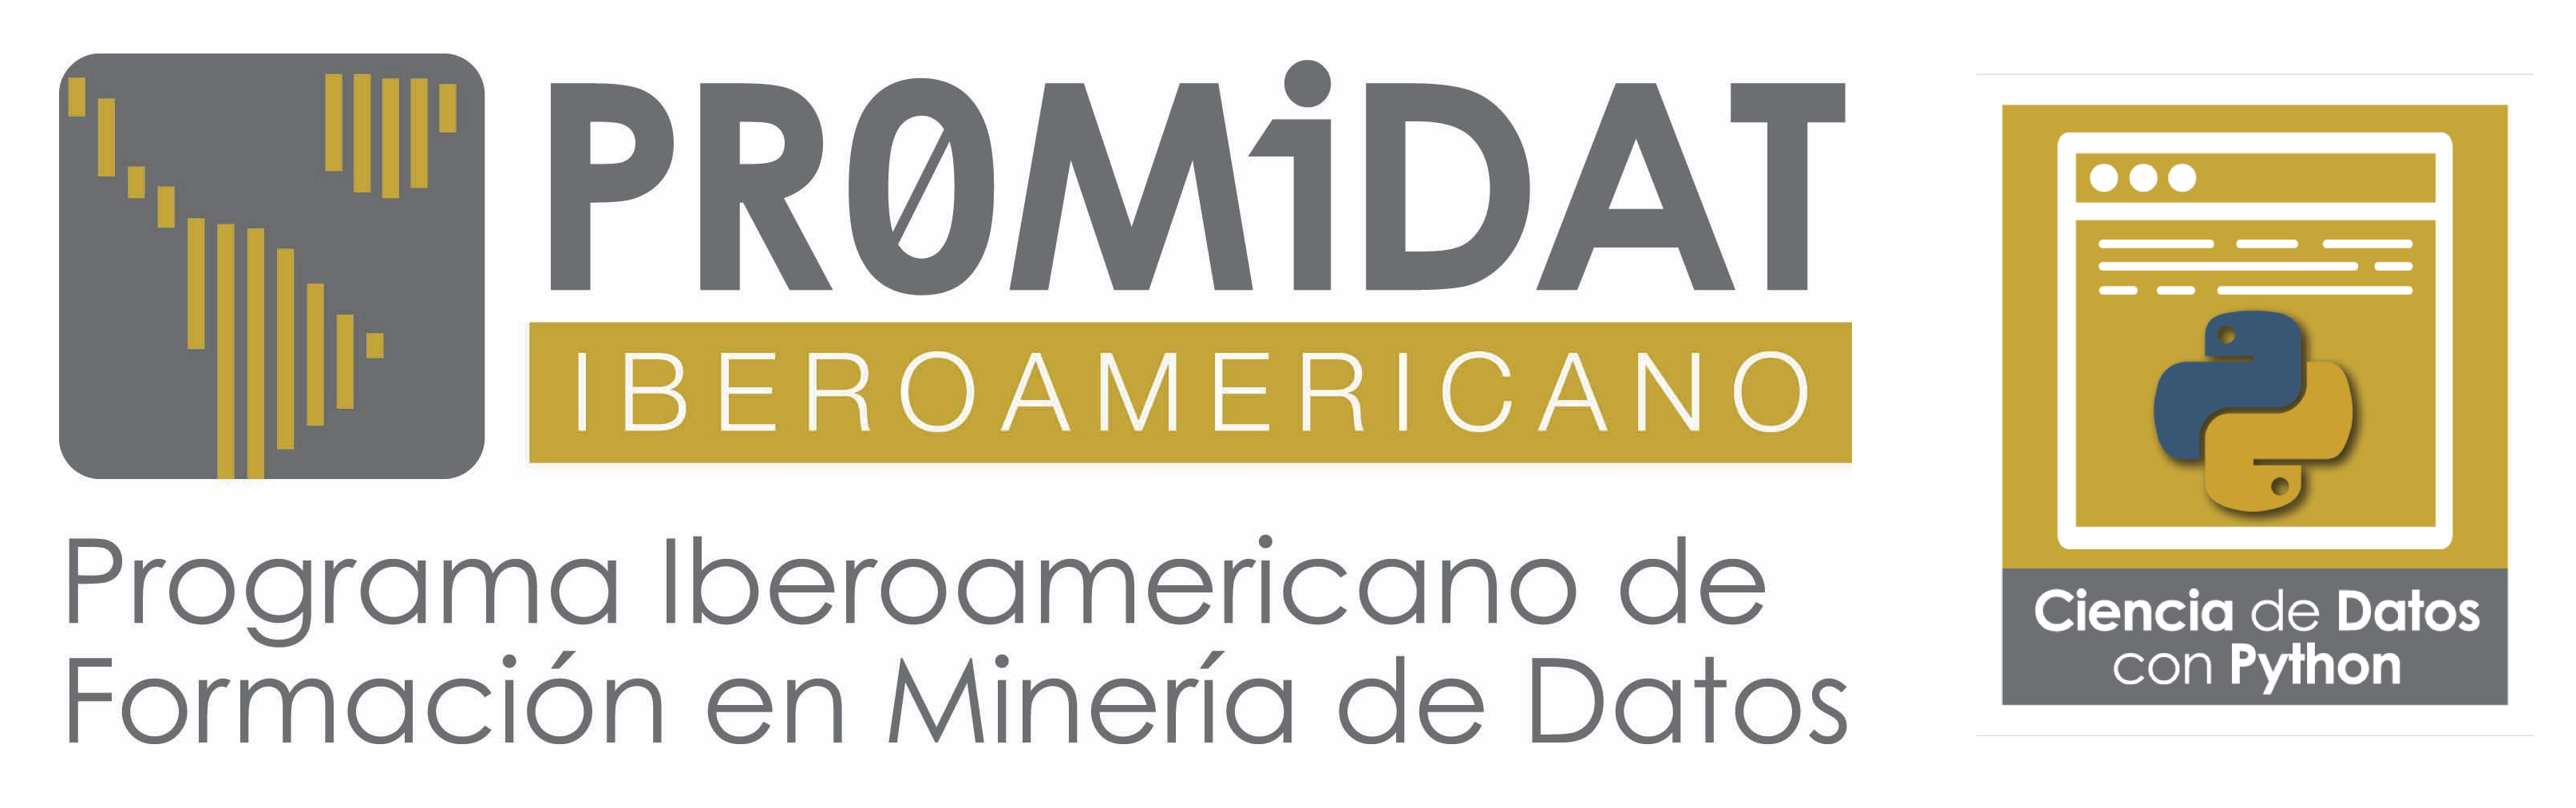

In [83]:
from IPython.display import Image
Image(filename='./logo_python.png')

In [111]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report  
import numpy as np 
import seaborn as sn  
import matplotlib.pyplot as plt  



__Definimos el alfabeto__

In [112]:
alfabeto = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

__Creamos diccionario__

In [113]:
# crear mapeo de caracteres a números enteros (0-25) y viceversa
char_to_int = dict((c, i) for i, c in enumerate(alfabeto))
int_to_char = dict((i, c) for i, c in enumerate(alfabeto))

__Creamos los datos de entrada__

In [114]:
# creamos nuestros pares de entrada y salida para entrenar nuestra red neuronal
seq_length = 1
dataX = []
dataY = []

for i in range(0, len(alfabeto) - seq_length):
    seq_in = alfabeto[i:i + seq_length]
    seq_out = alfabeto[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    print(seq_in, '-&amp;gt;', seq_out)

A -&amp;gt; B
B -&amp;gt; C
C -&amp;gt; D
D -&amp;gt; E
E -&amp;gt; F
F -&amp;gt; G
G -&amp;gt; H
H -&amp;gt; I
I -&amp;gt; J
J -&amp;gt; K
K -&amp;gt; L
L -&amp;gt; M
M -&amp;gt; N
N -&amp;gt; O
O -&amp;gt; P
P -&amp;gt; Q
Q -&amp;gt; R
R -&amp;gt; S
S -&amp;gt; T
T -&amp;gt; U
U -&amp;gt; V
V -&amp;gt; W
W -&amp;gt; X
X -&amp;gt; Y
Y -&amp;gt; Z


__Remodelamos los datos al formato esperado por la red__

In [115]:
X = numpy.reshape(dataX, (len(dataX), seq_length, 1))

__Normalizamos los datos__

In [116]:
X = X / float(len(alfabeto))

__Pasamos a formato One-Hot los datos de salida__

In [117]:
y = np_utils.to_categorical(dataY)

y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

__Creación del modelo__

In [118]:
# Vamos a crear una red LSTM con 32 unidades y una salida
# función de activación de softmax para hacer predicciones
# la función de pérdida de registro (llamada cruzamiento categórico o categorical_crossentropy en Keras) 
# función de optimización de ADAM


def create_simple_rnn():
    
    modelo = Sequential()

    modelo.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
    modelo.add(Dense(y.shape[1], activation='softmax'))
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return modelo



In [119]:
rnn_modelo = create_simple_rnn()  

__Resumen del modelo__

In [120]:
rnn_modelo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                858       
Total params: 5,210
Trainable params: 5,210
Non-trainable params: 0
_________________________________________________________________


__Entrenamiento del modelo__

In [121]:
# Se ajusta con 500 epochs con un tamaño de lote de 1.

rnn_modelo.fit(X, y, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
25/25 - 1s - loss: 3.2629 - accuracy: 0.0000e+00
Epoch 2/500
25/25 - 0s - loss: 3.2549 - accuracy: 0.0400
Epoch 3/500
25/25 - 0s - loss: 3.2515 - accuracy: 0.0400
Epoch 4/500
25/25 - 0s - loss: 3.2484 - accuracy: 0.0400
Epoch 5/500
25/25 - 0s - loss: 3.2456 - accuracy: 0.0400
Epoch 6/500
25/25 - 0s - loss: 3.2422 - accuracy: 0.0000e+00
Epoch 7/500
25/25 - 0s - loss: 3.2390 - accuracy: 0.0400
Epoch 8/500
25/25 - 0s - loss: 3.2361 - accuracy: 0.0400
Epoch 9/500
25/25 - 0s - loss: 3.2323 - accuracy: 0.0400
Epoch 10/500
25/25 - 0s - loss: 3.2288 - accuracy: 0.0400
Epoch 11/500
25/25 - 0s - loss: 3.2253 - accuracy: 0.0400
Epoch 12/500
25/25 - 0s - loss: 3.2212 - accuracy: 0.0400
Epoch 13/500
25/25 - 0s - loss: 3.2171 - accuracy: 0.0400
Epoch 14/500
25/25 - 0s - loss: 3.2126 - accuracy: 0.0400
Epoch 15/500
25/25 - 0s - loss: 3.2082 - accuracy: 0.0400
Epoch 16/500
25/25 - 0s - loss: 3.2038 - accuracy: 0.0400
Epoch 17/500
25/25 - 0s - loss: 3.1979 - accuracy: 0.0400
Epoch 18/500
25

Epoch 142/500
25/25 - 0s - loss: 2.2952 - accuracy: 0.2800
Epoch 143/500
25/25 - 0s - loss: 2.2907 - accuracy: 0.2000
Epoch 144/500
25/25 - 0s - loss: 2.2910 - accuracy: 0.2400
Epoch 145/500
25/25 - 0s - loss: 2.2855 - accuracy: 0.2800
Epoch 146/500
25/25 - 0s - loss: 2.2816 - accuracy: 0.2400
Epoch 147/500
25/25 - 0s - loss: 2.2793 - accuracy: 0.2400
Epoch 148/500
25/25 - 0s - loss: 2.2747 - accuracy: 0.2400
Epoch 149/500
25/25 - 0s - loss: 2.2735 - accuracy: 0.2400
Epoch 150/500
25/25 - 0s - loss: 2.2689 - accuracy: 0.2800
Epoch 151/500
25/25 - 0s - loss: 2.2655 - accuracy: 0.2000
Epoch 152/500
25/25 - 0s - loss: 2.2635 - accuracy: 0.2000
Epoch 153/500
25/25 - 0s - loss: 2.2599 - accuracy: 0.2400
Epoch 154/500
25/25 - 0s - loss: 2.2558 - accuracy: 0.2400
Epoch 155/500
25/25 - 0s - loss: 2.2546 - accuracy: 0.2400
Epoch 156/500
25/25 - 0s - loss: 2.2509 - accuracy: 0.2800
Epoch 157/500
25/25 - 0s - loss: 2.2483 - accuracy: 0.2400
Epoch 158/500
25/25 - 0s - loss: 2.2448 - accuracy: 0.24

Epoch 281/500
25/25 - 0s - loss: 1.9730 - accuracy: 0.5600
Epoch 282/500
25/25 - 0s - loss: 1.9721 - accuracy: 0.4800
Epoch 283/500
25/25 - 0s - loss: 1.9707 - accuracy: 0.5200
Epoch 284/500
25/25 - 0s - loss: 1.9686 - accuracy: 0.5200
Epoch 285/500
25/25 - 0s - loss: 1.9664 - accuracy: 0.6000
Epoch 286/500
25/25 - 0s - loss: 1.9655 - accuracy: 0.5200
Epoch 287/500
25/25 - 0s - loss: 1.9634 - accuracy: 0.5600
Epoch 288/500
25/25 - 0s - loss: 1.9632 - accuracy: 0.5200
Epoch 289/500
25/25 - 0s - loss: 1.9598 - accuracy: 0.5600
Epoch 290/500
25/25 - 0s - loss: 1.9578 - accuracy: 0.5200
Epoch 291/500
25/25 - 0s - loss: 1.9561 - accuracy: 0.4800
Epoch 292/500
25/25 - 0s - loss: 1.9541 - accuracy: 0.4800
Epoch 293/500
25/25 - 0s - loss: 1.9533 - accuracy: 0.5600
Epoch 294/500
25/25 - 0s - loss: 1.9509 - accuracy: 0.5600
Epoch 295/500
25/25 - 0s - loss: 1.9508 - accuracy: 0.5600
Epoch 296/500
25/25 - 0s - loss: 1.9492 - accuracy: 0.6000
Epoch 297/500
25/25 - 0s - loss: 1.9475 - accuracy: 0.52

Epoch 420/500
25/25 - 0s - loss: 1.7804 - accuracy: 0.6800
Epoch 421/500
25/25 - 0s - loss: 1.7761 - accuracy: 0.6800
Epoch 422/500
25/25 - 0s - loss: 1.7775 - accuracy: 0.7200
Epoch 423/500
25/25 - 0s - loss: 1.7757 - accuracy: 0.6800
Epoch 424/500
25/25 - 0s - loss: 1.7735 - accuracy: 0.8000
Epoch 425/500
25/25 - 0s - loss: 1.7731 - accuracy: 0.7200
Epoch 426/500
25/25 - 0s - loss: 1.7721 - accuracy: 0.7200
Epoch 427/500
25/25 - 0s - loss: 1.7707 - accuracy: 0.7200
Epoch 428/500
25/25 - 0s - loss: 1.7734 - accuracy: 0.7200
Epoch 429/500
25/25 - 0s - loss: 1.7689 - accuracy: 0.6800
Epoch 430/500
25/25 - 0s - loss: 1.7671 - accuracy: 0.7200
Epoch 431/500
25/25 - 0s - loss: 1.7657 - accuracy: 0.7200
Epoch 432/500
25/25 - 0s - loss: 1.7654 - accuracy: 0.7200
Epoch 433/500
25/25 - 0s - loss: 1.7653 - accuracy: 0.7200
Epoch 434/500
25/25 - 0s - loss: 1.7643 - accuracy: 0.7600
Epoch 435/500
25/25 - 0s - loss: 1.7607 - accuracy: 0.8000
Epoch 436/500
25/25 - 0s - loss: 1.7612 - accuracy: 0.76

__Predicción del modelo__

In [122]:
#Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:
rnn_modelo_pred = rnn_modelo.predict(X, batch_size=32, verbose=1)  
rnn_modelo_predicted = np.argmax(rnn_modelo_pred, axis=1)

1/1 [==============================] - 0s 263ms/step


__Matriz de confusión__

In [123]:
rnn_modelo_cm = confusion_matrix(np.argmax(y, axis=1), rnn_modelo_predicted)

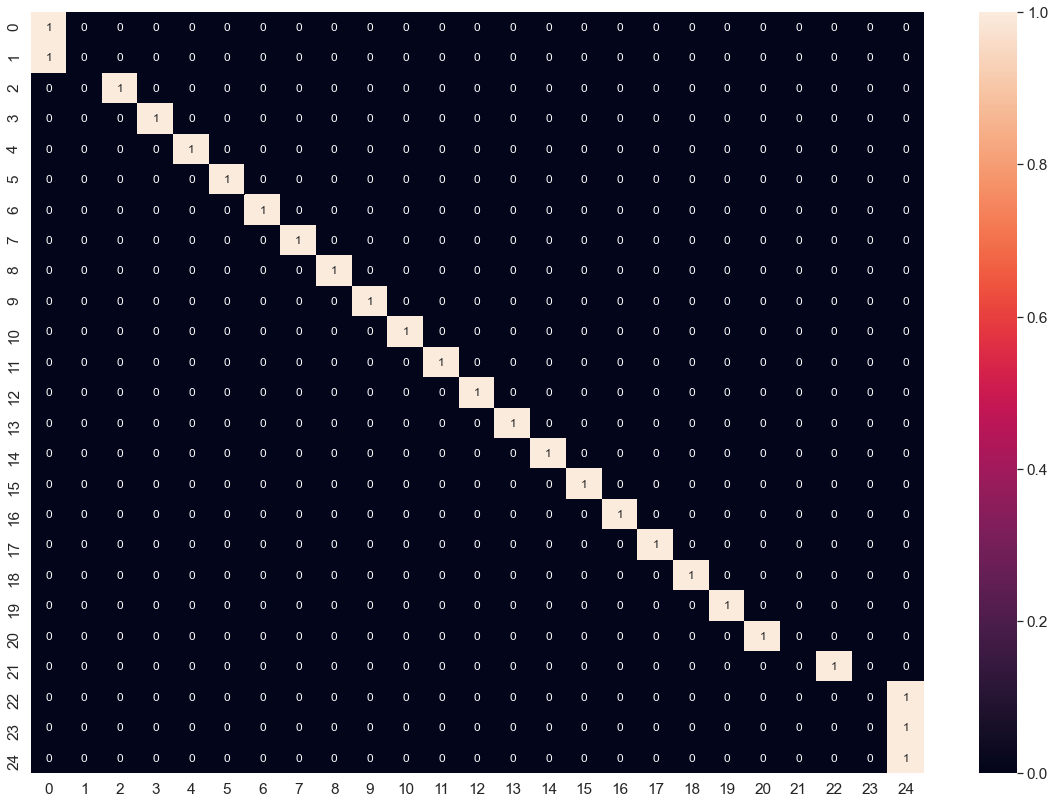

In [124]:
# Visualiamos la matriz de confusión
rnn_modelo_df_cm = pd.DataFrame(rnn_modelo_cm, range(25), range(25))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(rnn_modelo_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [125]:
# demuestra la predicciones del modelo
for pattern in dataX:
  x = numpy.reshape(pattern, (1, len(pattern), 1))
  x = x / float(len(alfabeto))
  prediction = rnn_modelo.predict(x, verbose=0)
  index = numpy.argmax(prediction)
  result = int_to_char[index]
  seq_in = [int_to_char[value] for value in pattern]
  print(seq_in, "-&gt;", result)


['A'] -&gt; B
['B'] -&gt; B
['C'] -&gt; D
['D'] -&gt; E
['E'] -&gt; F
['F'] -&gt; G
['G'] -&gt; H
['H'] -&gt; I
['I'] -&gt; J
['J'] -&gt; K
['K'] -&gt; L
['L'] -&gt; M
['M'] -&gt; N
['N'] -&gt; O
['O'] -&gt; P
['P'] -&gt; Q
['Q'] -&gt; R
['R'] -&gt; S
['S'] -&gt; T
['T'] -&gt; U
['U'] -&gt; V
['V'] -&gt; X
['W'] -&gt; Z
['X'] -&gt; Z
['Y'] -&gt; Z


In [126]:
# sumariza el rendimiento del modelo
scores = rnn_modelo.evaluate(X, y, verbose=0)
print("Precisión del modelo: %.2f%%" % (scores[1]*100))


Precisión del modelo: 84.00%


__Índices__

In [127]:
rnn_report = classification_report(np.argmax(y, axis=1), rnn_modelo_predicted)  
print(rnn_report)  

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    